<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


Connect to the database.


In [3]:

from pyodide.http import pyfetch
import pandas as pd

filename="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
await download(filename, "m4_survey_data.sqlite")


In [19]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [5]:
import pandas as pd

## Demo: How to run an sql query


In [26]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [14]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [27]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [28]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


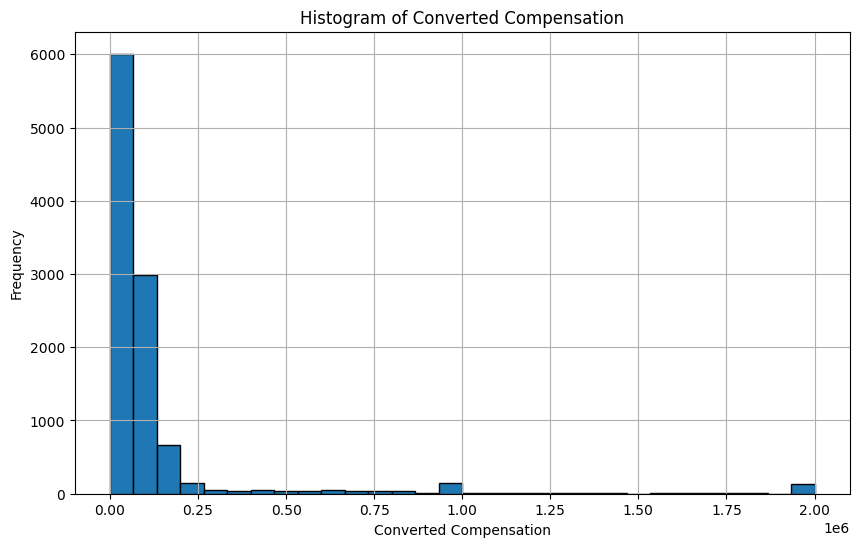

In [21]:
# your code goes here
# Plot a histogram of the 'ConvertedComp' column
import matplotlib.pyplot as plt

QUERY = """
SELECT ConvertedComp
FROM master
"""

# Use pd.read_sql_query to run the SQL query and return the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, edgecolor='k')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()



### Box Plots


Plot a box plot of `Age.`


       index  Respondent                      MainBranch Hobbyist  \
0          0           4  I am a developer by profession       No   
1          1           9  I am a developer by profession      Yes   
2          2          13  I am a developer by profession      Yes   
3          3          16  I am a developer by profession      Yes   
4          4          17  I am a developer by profession      Yes   
...      ...         ...                             ...      ...   
11393  11393       25136  I am a developer by profession      Yes   
11394  11394       25137  I am a developer by profession      Yes   
11395  11395       25138  I am a developer by profession      Yes   
11396  11396       25141  I am a developer by profession      Yes   
11397  11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more 

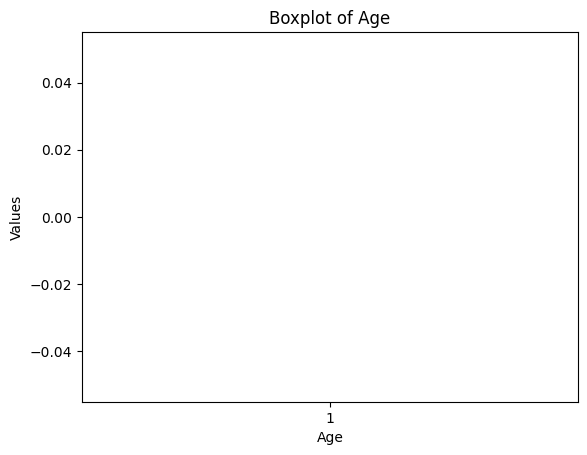

In [60]:
QUERY = """select * from master"""

df = pd.read_sql_query(QUERY, conn)

# Check the DataFrame to ensure the data is as expected
print(df)

# Check if 'Age' column contains numeric values
print(df['Age'].dtype)

# Plot the boxplot
plt.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.ylabel("Values")

# Display the plot
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


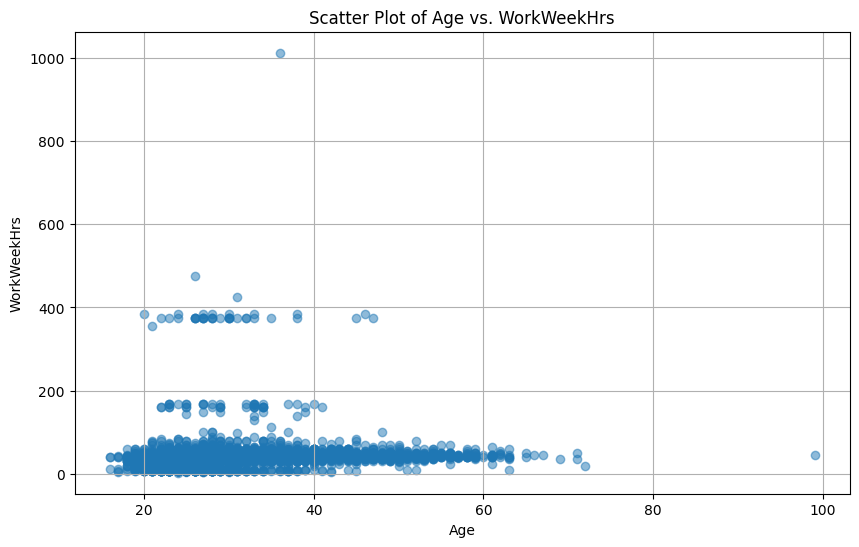

In [48]:
# your code goes here

conn = sqlite3.connect("m4_survey_data.sqlite")


QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

# Use pd.read_sql_query to run the SQL query and return the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Create a scatter plot of 'Age' vs. 'WorkWeekHrs'
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)
plt.title('Scatter Plot of Age vs. WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)

# Show the plot
plt.show()

# Close the database connection
conn.close()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


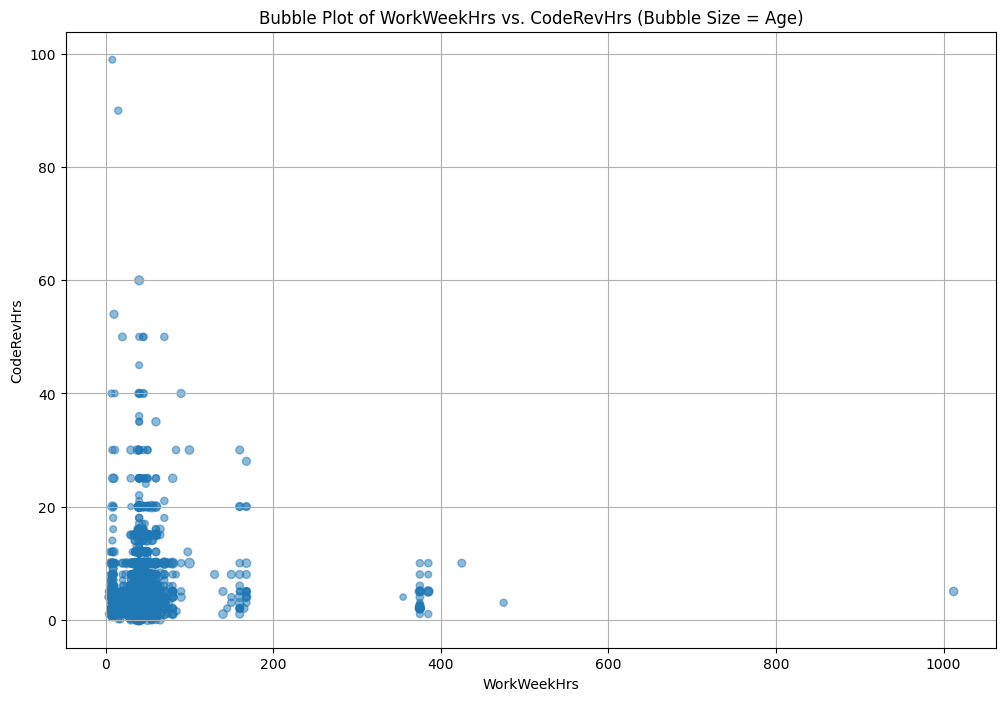

In [50]:
# your code goes here
conn = sqlite3.connect("m4_survey_data.sqlite")

# Define the SQL query to fetch the 'WorkWeekHrs', 'CodeRevHrs', and 'Age' columns
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

# Use pd.read_sql_query to run the SQL query and return the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Create a bubble plot of 'WorkWeekHrs' vs. 'CodeRevHrs' with 'Age' as the bubble size
plt.figure(figsize=(12, 8))
plt.scatter(
    df['WorkWeekHrs'],
    df['CodeRevHrs'],
    s=df['Age'],  # Use 'Age' as the bubble size
    alpha=0.5
)
plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs (Bubble Size = Age)')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)

# Show the plot
plt.show()

# Close the database connection
conn.close()

## Visualizing composition of data


### Pie Charts


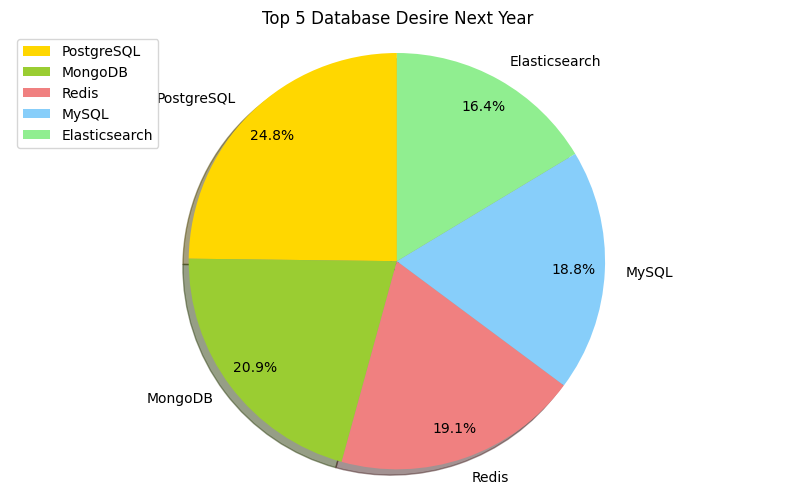

In [12]:
# Connect to the SQLite database
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

# Assuming you have a connection named "conn"
# conn = ...

# Execute the SQL query and read it into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Set the index of the DataFrame
df.set_index('DatabaseDesireNextYear', inplace=True)

# Define colors and labels for the pie chart
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
labels = df.index  # Use the index as labels

# Create the pie chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.pie(df['Count'], labels=labels, colors=color_list, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85)
plt.title('Top 5 Database Desire Next Year')  # Add the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with proper labels
plt.legend(labels, loc='upper left')

# Show the pie chart
plt.show()


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


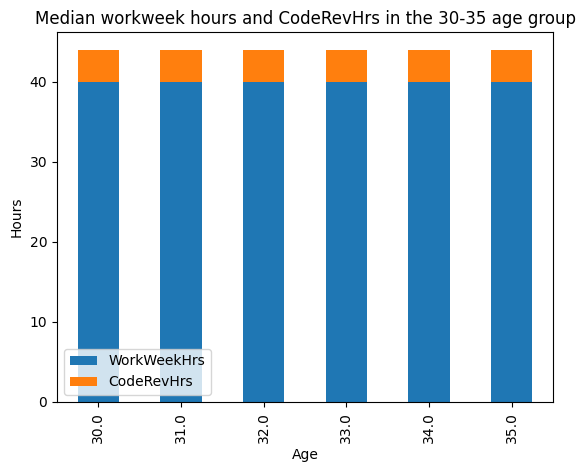

In [59]:
# your code goes here
QUERY = """
SELECT Age, WorkweekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df_wk = pd.read_sql_query(QUERY, conn)
df_g = df_wk.groupby("Age").median()
df_g.plot(kind='bar', stacked=True)
plt.title('Median workweek hours and CodeRevHrs in the 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


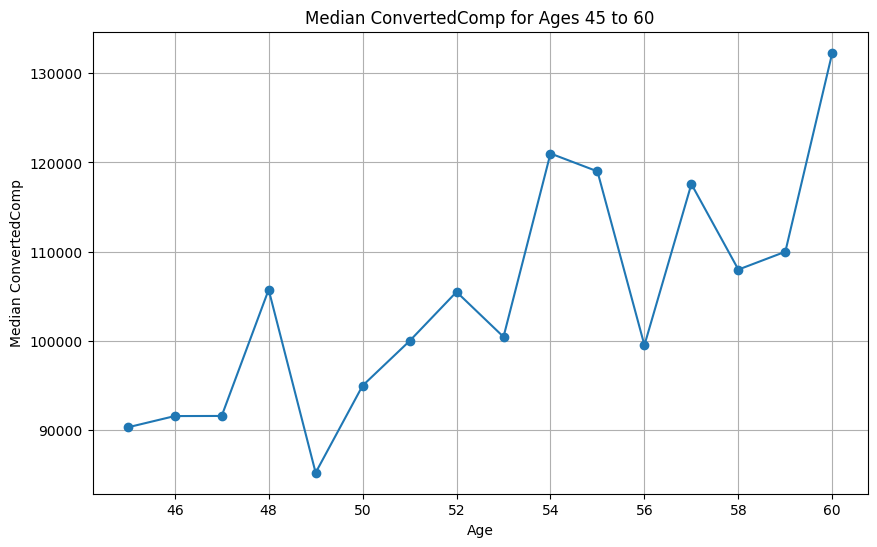

In [69]:
# your code goes here

conn = sqlite3.connect("m4_survey_data.sqlite")

# Define the SQL query to fetch 'ConvertedComp' for ages between 45 and 60
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

# Use pd.read_sql_query to run the SQL query and return the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Group the data by 'Age' and calculate the median 'ConvertedComp' for each age group
median_comp_by_age = df.groupby('Age')['ConvertedComp'].median().reset_index()

# Create a line plot of the median 'ConvertedComp' for ages from 45 to 60
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedComp'], marker='o')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)

# Show the plot
plt.show()

# Close the database connection
conn.close()




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


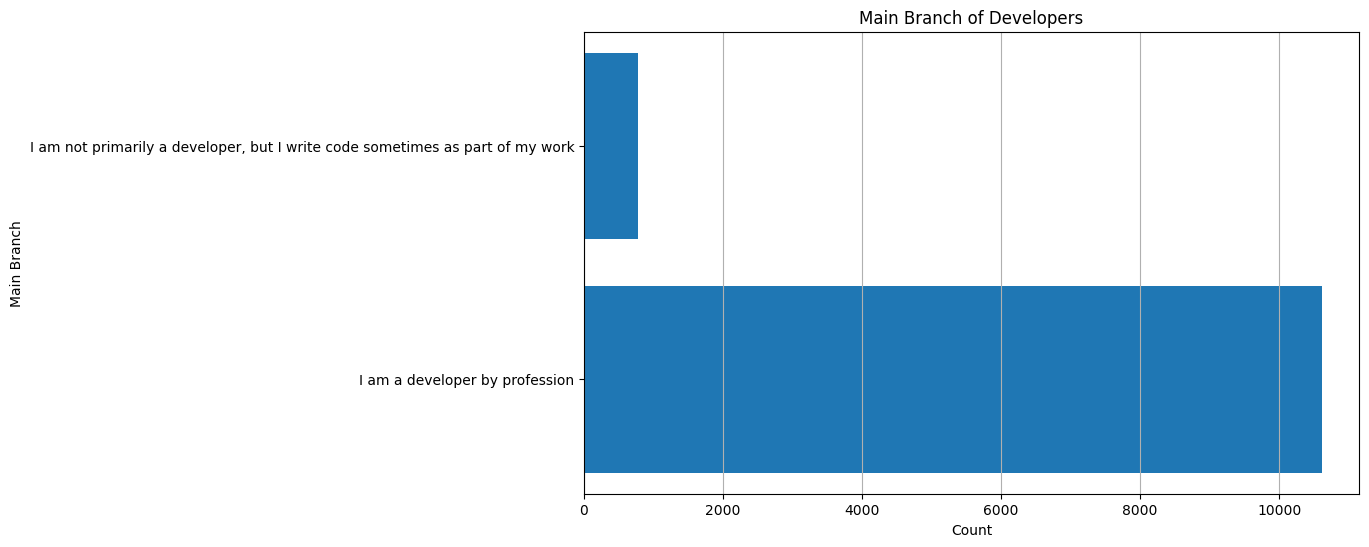

In [68]:
# your code goes here
conn = sqlite3.connect("m4_survey_data.sqlite")

# Define the SQL query to fetch the 'MainBranch' column
QUERY = """
SELECT MainBranch, COUNT(*) AS Count
FROM master
GROUP BY MainBranch
"""

# Use pd.read_sql_query to run the SQL query and return the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'])
plt.title('Main Branch of Developers')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.grid(axis='x')

# Show the plot
plt.show()

# Close the database connection
conn.close()



Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
